In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import numpy as np
import copy
import seaborn as sns
from pandas.plotting import scatter_matrix

## Reading excel file


In [3]:
xls = pd.ExcelFile('data.xlsx')

## Reading individual Sheets

In [4]:
# Industrialisation DataFrame
ind = pd.read_excel(xls, 'industrialisation')
ind.head()
ind.shape

(2840, 30)

In [5]:
# CO2 dataframe
co2 = pd.read_excel(xls, 'Co2')
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
5,Afghanistan,AFG,1954,106256.00
6,Afghanistan,AFG,1955,153888.00
7,Afghanistan,AFG,1956,183200.00
8,Afghanistan,AFG,1957,293120.00
9,Afghanistan,AFG,1958,329760.00


In [6]:
co2.shape

(20853, 4)

In [7]:
# Global Temps Dataframe
gltemp = pd.read_excel(xls, 'GlobalLandTemperaturesByCity')
gltemp.head()
gltemp.shape

(1048575, 7)

## Cleaning the DFs

### Cleaning Global Temps By City

In [8]:
gltemp.isna().sum()

dt                                   0
AverageTemperature               47547
AverageTemperatureUncertainty    47547
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [9]:
gltemp.iloc[798583]['dt']

datetime.datetime(1900, 7, 1, 0, 0)

In [10]:
gltemp = gltemp.dropna()

In [11]:
gltemp.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [12]:
print(gltemp.iloc[798580])

dt                               1987-07-01 00:00:00
AverageTemperature                             22.97
AverageTemperatureUncertainty                  0.207
City                                           Benxi
Country                                        China
Latitude                                      40.99N
Longitude                                    123.55E
Name: 836224, dtype: object


In [13]:
gltemp = gltemp.reset_index()

In [14]:
del gltemp['index']

In [15]:
gltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [16]:
gltemp['dt'] = pd.to_datetime(gltemp['dt'])


In [17]:
gltemp.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [18]:
gltemp = gltemp[gltemp['dt'] > pd.Timestamp(year=1989, day=31, month=12)]

In [19]:
gltemp.head()
gltemp.shape

(119879, 7)

In [20]:
gltemp = gltemp.reset_index(drop=True)

In [21]:
gltemp['dt'] = gltemp['dt'].dt.year
gltemp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,4.267,0.459,Ã…rhus,Denmark,57.05N,10.33E
1,1990,5.895,0.460,Ã…rhus,Denmark,57.05N,10.33E
2,1990,6.565,0.299,Ã…rhus,Denmark,57.05N,10.33E
3,1990,8.068,0.222,Ã…rhus,Denmark,57.05N,10.33E
4,1990,12.944,0.287,Ã…rhus,Denmark,57.05N,10.33E
5,1990,15.672,0.403,Ã…rhus,Denmark,57.05N,10.33E
6,1990,16.844,0.319,Ã…rhus,Denmark,57.05N,10.33E
7,1990,17.402,0.208,Ã…rhus,Denmark,57.05N,10.33E
8,1990,12.446,0.393,Ã…rhus,Denmark,57.05N,10.33E
9,1990,9.409,0.240,Ã…rhus,Denmark,57.05N,10.33E


In [22]:
# List of countries being analysed
countries = ['India', 'China', 'United States', 'United Kingdom', 'Japan', 'Germany']

country = gltemp[gltemp['Country'].isin(countries)]

In [23]:
country = country.reset_index(drop=True)
country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,-13.093,0.522,ÃœrÃ¼mqi,China,44.20N,87.20E
1,1990,-10.704,0.399,ÃœrÃ¼mqi,China,44.20N,87.20E
2,1990,-0.075,0.469,ÃœrÃ¼mqi,China,44.20N,87.20E
3,1990,9.557,0.249,ÃœrÃ¼mqi,China,44.20N,87.20E
4,1990,17.972,0.285,ÃœrÃ¼mqi,China,44.20N,87.20E
5,1990,24.084,0.454,ÃœrÃ¼mqi,China,44.20N,87.20E
6,1990,23.347,0.592,ÃœrÃ¼mqi,China,44.20N,87.20E
7,1990,22.547,0.493,ÃœrÃ¼mqi,China,44.20N,87.20E
8,1990,17.757,0.537,ÃœrÃ¼mqi,China,44.20N,87.20E
9,1990,9.263,0.374,ÃœrÃ¼mqi,China,44.20N,87.20E


In [24]:
grouped = country.groupby(['dt', 'Country']).mean()

In [25]:
grouped

AverageTemperature  AverageTemperatureUncertainty
dt   Country                                                          
1990 China                    10.930208                       0.331760
     Germany                   9.785250                       0.289024
     India                    26.033152                       0.395594
     Japan                    14.147424                       0.269750
     United Kingdom           10.101881                       0.279119
     United States            13.613642                       0.293056
1991 China                    10.279244                       0.317311
     Germany                   8.604786                       0.225417
     India                    26.205368                       0.348993
     Japan                    13.343465                       0.213812
     United Kingdom            9.213952                       0.234548
     United States            13.466462                       0.257059
1992 China                    10.120032                       0.343237
     Germany                   9.540690                       0.308512
     India                    26.128189                       0.354745
     Japan                    13.023222                       0.250021
     United Kingdom            9.409429                       0.278107
     United States            12.964017                       0.300580
1993 China                    10.037878                       0.323776
     Germany                   8.754619                       0.252857
     India                    26.249033                       0.368462
     Japan                    12.570507                       0.223368
     United Kingdom            8.940036                       0.254143
     United States            12.875826                       0.268625
1994 China                    10.731699                       0.318279
     Germany                   9.903631                       0.227143
     India                    26.179136                       0.359463
     Japan                    13.823049                       0.237111
     United Kingdom            9.508690                       0.270512
     United States            13.135431                       0.274135
...                                 ...                            ...
2009 China                    10.641939                       0.336369
     Germany                   9.482298                       0.242107
     India                    26.967548                       0.352039
     Japan                    13.535861                       0.235181
     United Kingdom            9.846750                       0.243821
     United States            13.213097                       0.290611
2010 China                    10.287744                       0.352538
     Germany                   8.133321                       0.229988
     India                    26.935092                       0.376645
     Japan                    13.800417                       0.225646
     United Kingdom            8.693286                       0.262071
     United States            13.390740                       0.283569
2011 China                    10.345452                       0.373913
     Germany                  10.035810                       0.246143
     India                    26.210260                       0.374904
     Japan                    13.315500                       0.235000
     United Kingdom           10.320298                       0.263679
     United States            13.626875                       0.304747
2012 China                    10.120003                       0.545638
     Germany                   9.308083                       0.295560
     India                    26.537764                       0.462090
     Japan                    13.111993                       0.311049
     United Kingdom            9.368905                       0.294571
     United States            14.296024      

In [26]:
temp = grouped.reset_index()
temp

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1990,China,10.930208,0.331760
1,1990,Germany,9.785250,0.289024
2,1990,India,26.033152,0.395594
3,1990,Japan,14.147424,0.269750
4,1990,United Kingdom,10.101881,0.279119
5,1990,United States,13.613642,0.293056
6,1991,China,10.279244,0.317311
7,1991,Germany,8.604786,0.225417
8,1991,India,26.205368,0.348993
9,1991,Japan,13.343465,0.213812


### Cleaning the co2 dataset

In [27]:
country = co2[co2['Entity'].isin(countries)]

In [28]:
co2 = country.reset_index(drop=True)

In [29]:
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,China,CHN,1751,0.000000e+00
1,China,CHN,1752,0.000000e+00
2,China,CHN,1753,0.000000e+00
3,China,CHN,1754,0.000000e+00
4,China,CHN,1755,0.000000e+00
5,China,CHN,1756,0.000000e+00
6,China,CHN,1757,0.000000e+00
7,China,CHN,1758,0.000000e+00
8,China,CHN,1759,0.000000e+00
9,China,CHN,1760,0.000000e+00


In [30]:
co2 = co2[co2['Year'] > 1989]
co2 = co2[co2['Year'] < 2014]

In [31]:
del co2['Code']
co2

,Entity,Year,Annual CO2 emissions (tonnes )
226,China,1990,2.420302e+09
227,China,1991,2.538924e+09
228,China,1992,2.657112e+09
229,China,1993,2.835795e+09
230,China,1994,3.010242e+09
231,China,1995,3.265057e+09
232,China,1996,3.408347e+09
233,China,1997,3.414549e+09
234,China,1998,3.265903e+09
235,China,1999,3.258135e+09


In [32]:
co2_g = co2.groupby(['Year', 'Entity']).mean()
co2_g

Annual CO2 emissions (tonnes )
Year Entity                                        
1990 China                             2.420302e+09
     Germany                           1.012902e+09
     India                             6.165791e+08
     Japan                             1.155263e+09
     United Kingdom                    6.010676e+08
     United States                     5.121264e+09
1991 China                             2.538924e+09
     Germany                           1.014972e+09
     India                             6.567409e+08
     Japan                             1.167041e+09
     United Kingdom                    6.090204e+08
     United States                     5.070839e+09
1992 China                             2.657112e+09
     Germany                           9.667058e+08
     India                             6.987569e+08
     Japan                             1.176943e+09
     United Kingdom                    5.935041e+08
     United States                     5.174059e+09
1993 China                             2.835795e+09
     Germany                           9.569942e+08
     India                             7.228943e+08
     Japan                             1.170197e+09
     United Kingdom                    5.794028e+08
     United States                     5.284688e+09
1994 China                             3.010242e+09
     Germany                           9.404080e+08
     India                             7.642420e+08
     Japan                             1.225173e+09
     United Kingdom                    5.756574e+08
     United States                     5.377987e+09
...                                             ...
2009 China                             7.758812e+09
     Germany                           7.899635e+08
     India                             1.720121e+09
     Japan                             1.160204e+09
     United Kingdom                    4.946047e+08
     United States                     5.495395e+09
2010 China                             8.500543e+09
     Germany                           8.336849e+08
     India                             1.700027e+09
     Japan                             1.211573e+09
     United Kingdom                    5.122143e+08
     United States                     5.701076e+09
2011 China                             9.388199e+09
     Germany                           8.108023e+08
     India                             1.817172e+09
     Japan                             1.261399e+09
     United Kingdom                    4.698115e+08
     United States                     5.570707e+09
2012 China                             9.633899e+09
     Germany                           8.151974e+08
     India                             1.983759e+09
     Japan                             1.302083e+09
     United Kingdom                    4.876708e+08
     United States                     5.366730e+09
2013 China                             9.796527e+09
     Germany                           8.326430e+08
     India                             1.997879e+09
     Japan                             1.314070e+09
     United Kingdom                    4.777326e+08
     United States                     5.519613e+09

[144 rows x 1 columns]

# industrialization dataframe

In [33]:
country = ind[ind['Country Name'].isin(countries)]

In [34]:
ind = country.reset_index(drop=True)

In [35]:
ind

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,CHN,China,3786,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,CHN,China,3787,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,CHN,China,3788,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,CHN,China,3789,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,CHN,China,3790,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,CHN,China,3791,Impact of a country on World Manufacturing Val...,Value,0.033536,0.037863,0.045071,0.053268,0.059694,...,0.117472,0.126562,0.138968,0.153513,0.181587,0.186882,0.197423,0.210459,0.219102,0.229128
6,CHN,China,3792,Share of world MVA index,Value,0.173312,0.201894,0.236516,0.270443,0.295573,...,0.575024,0.628600,0.709239,0.815550,0.977669,1.000000,1.000000,1.000000,1.000000,1.000000
7,CHN,China,3793,Industrialization intensity index,Value,0.563626,0.561078,0.578220,0.566404,0.571156,...,0.643858,0.652823,0.657836,0.661328,0.694810,0.731502,0.738504,0.740375,0.740964,0.755593
8,CHN,China,3794,Medium- and High-Tech Manufacturing Value Adde...,Value,0.378387,0.383534,0.395509,0.352256,0.355199,...,0.424449,0.423290,0.420701,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831
9,CHN,China,3795,Share of Medium and High-Tech Activities in To...,Value,0.577205,0.550754,0.560132,0.491528,0.487470,...,0.511364,0.498923,0.484481,0.468498,0.481051,0.479670,0.477007,0.480751,0.481928,0.511185


In [36]:
ind.isna().sum()

Country ISO3         0
Country Name         0
Indicator Id         0
Indicator            0
Subindicator Type    0
1990                 0
1991                 0
1992                 0
1993                 0
1994                 0
1995                 0
1996                 0
1997                 0
1998                 0
1999                 0
2000                 0
2001                 0
2002                 0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
2012                 0
2013                 0
2014                 0
dtype: int64

In [37]:
del ind['Country ISO3']
del ind['Indicator Id']
#del ind['Subindicator Type']
ind

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,China,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,China,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,27.000000,25.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,China,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,China,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,China,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,China,Impact of a country on World Manufacturing Val...,Value,0.033536,0.037863,0.045071,0.053268,0.059694,0.063942,0.069088,...,0.117472,0.126562,0.138968,0.153513,0.181587,0.186882,0.197423,0.210459,0.219102,0.229128
6,China,Share of world MVA index,Value,0.173312,0.201894,0.236516,0.270443,0.295573,0.311842,0.339095,...,0.575024,0.628600,0.709239,0.815550,0.977669,1.000000,1.000000,1.000000,1.000000,1.000000
7,China,Industrialization intensity index,Value,0.563626,0.561078,0.578220,0.566404,0.571156,0.588257,0.591811,...,0.643858,0.652823,0.657836,0.661328,0.694810,0.731502,0.738504,0.740375,0.740964,0.755593
8,China,Medium- and High-Tech Manufacturing Value Adde...,Value,0.378387,0.383534,0.395509,0.352256,0.355199,0.379784,0.372625,...,0.424449,0.423290,0.420701,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831
9,China,Share of Medium and High-Tech Activities in To...,Value,0.577205,0.550754,0.560132,0.491528,0.487470,0.506755,0.497307,...,0.511364,0.498923,0.484481,0.468498,0.481051,0.479670,0.477007,0.480751,0.481928,0.511185


In [38]:
ind_g = ind.groupby(['Country Name', 'Indicator', 'Subindicator Type']).mean()
ind_g

1990  \
Country Name   Indicator                                          Subindicator Type                
China          Competitive Industrial Performance Quintile        Value                 0.700000   
               Competitive Industrial Performance Rank            Rank                 32.000000   
               Competitive Industrial Performance Score           Value                 0.088960   
               Impact of a country on World Manufactures Trade    Value                 0.025118   
               Impact of a country on World Manufacturing Valu... Value                 0.033536   
               Industrial export quality index                    Value                 0.595937   
               Industrialization intensity index                  Value                 0.563626   
               MVA per capita index                               Value                 0.013570   
               Manufactured Exports per capita                    Value                59.520071   
               Manufactured Exports per capita index              Value                 0.003678   
               Manufactured Exports share in total exports        Value                 0.840088   
               Manufacturing Value Added per capita               Value               161.206594   
               Medium- and High-Tech Manufacturing Value Added... Value                 0.378387   
               Medium- and High-Tech manufactured Exports shar... Value                 0.284444   
               Share in world manufacturing exports index         Value                 0.170583   
               Share of MVA in GDP index                          Value                 0.550047   
               Share of Medium and High-Tech Activities in Man... Value                 0.342066   
               Share of Medium and High-Tech Activities in Tot... Value                 0.577205   
               Share of manufactured exports in total exports ... Value                 0.849808   
               Share of world MVA index                           Value                 0.173312   
Germany        Competitive Industrial Performance Quintile        Value                 0.900000   
               Competitive Industrial Performance Rank            Rank                  1.000000   
               Competitive Industrial Performance Score           Value                 0.616037   
               Impact of a country on World Manufactures Trade    Value                 0.147250   
               Impact of a country on World Manufacturing Valu... Value                 0.101940   
               Industrial export quality index                    Value                 0.875081   
               Industrialization intensity index                  Value                 0.661786   
               MVA per capita index                               Value                 0.636065   
               Manufactured Exports per capita                    Value              4524.199228   
               Manufactured Exports per capita index              Value                 0.281620   
...                                                                                          ...   
United Kingdom Manufactured Exports share in total exports        Value                 0.840724   
               Manufacturing Value Added per capita               Value              3864.383217   
               Medium- and High-Tech Manufacturing Value Added... Value                 0.447573   
               Medium- and High-Tech manufactured Exports shar... Value                 0.658528   
               Share in world manufacturing exports index         Value                 0.440725   
               Share of MVA in GDP index                          Value                 0.309191   
               Share of Medium and High-Tech Activities in Man... Value                 0.791930   
               Share of Medium and High-Tech Activities in Tot... Value                 0.68

## Plotting


In [39]:
temp

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1990,China,10.930208,0.331760
1,1990,Germany,9.785250,0.289024
2,1990,India,26.033152,0.395594
3,1990,Japan,14.147424,0.269750
4,1990,United Kingdom,10.101881,0.279119
5,1990,United States,13.613642,0.293056
6,1991,China,10.279244,0.317311
7,1991,Germany,8.604786,0.225417
8,1991,India,26.205368,0.348993
9,1991,Japan,13.343465,0.213812


In [40]:
india = temp[temp['Country'] == 'India']
japan = temp[temp['Country'] == 'Japan']
uk = temp[temp['Country'] == 'United Kingdom']
usa = temp[temp['Country'] == 'United States']
china = temp[temp['Country'] == 'China']
germany = temp[temp['Country'] == 'Germany']

In [41]:
dates = india['dt'].to_list()
dates

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

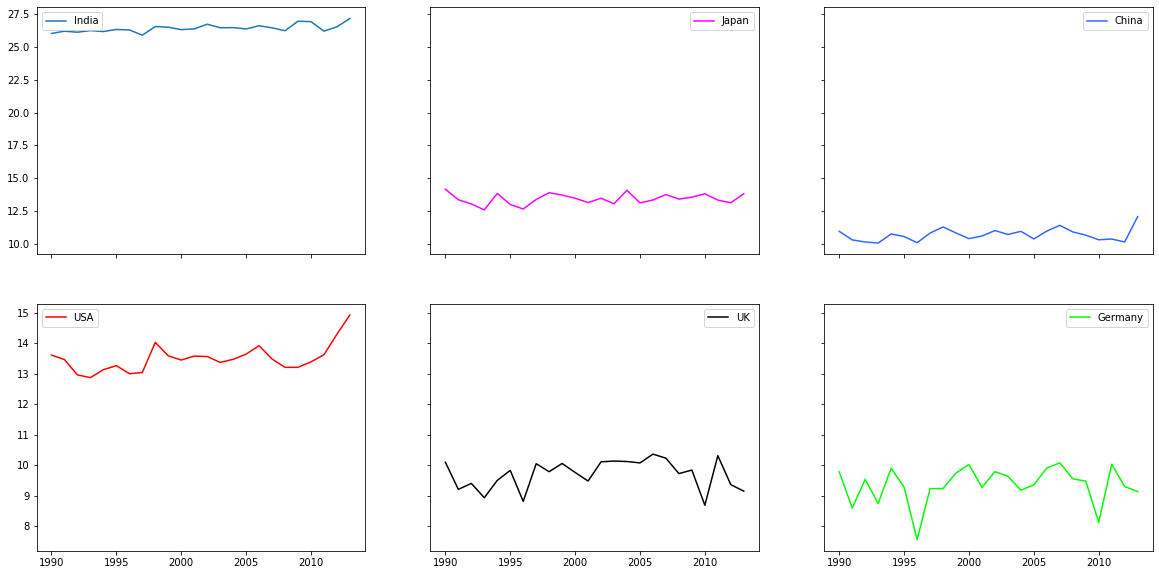

In [42]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')

ax[0, 0].plot(dates, india['AverageTemperature'], label='India')
ax[0, 0].legend()

ax[0, 1].plot(dates, japan['AverageTemperature'], label='Japan', c='#ff00ff')
ax[0, 1].legend()

ax[0, 2].plot(dates, china['AverageTemperature'], label='China', c='#3366ff')
ax[0, 2].legend()

ax[1, 0].plot(dates, usa['AverageTemperature'], label='USA', c='red')
ax[1, 0].legend()

ax[1, 1].plot(dates, uk['AverageTemperature'], label='UK', c='black')
ax[1, 1].legend()

ax[1, 2].plot(dates, germany['AverageTemperature'], label='Germany', c='#00ff00')
ax[1, 2].legend()

In [43]:
co2 = co2_g.reset_index()
co2 = co2.rename(columns={'Entity':'Country'})
co2

,Year,Country,Annual CO2 emissions (tonnes )
0,1990,China,2.420302e+09
1,1990,Germany,1.012902e+09
2,1990,India,6.165791e+08
3,1990,Japan,1.155263e+09
4,1990,United Kingdom,6.010676e+08
5,1990,United States,5.121264e+09
6,1991,China,2.538924e+09
7,1991,Germany,1.014972e+09
8,1991,India,6.567409e+08
9,1991,Japan,1.167041e+09


In [44]:
india_co2 = co2[co2['Country'] == 'India']
japan_co2 = co2[co2['Country'] == 'Japan']
uk_co2= co2[co2['Country'] == 'United Kingdom']
usa_co2 = co2[co2['Country'] == 'United States']
china_co2 = co2[co2['Country'] == 'China']
germany_co2 = co2[co2['Country'] == 'Germany']

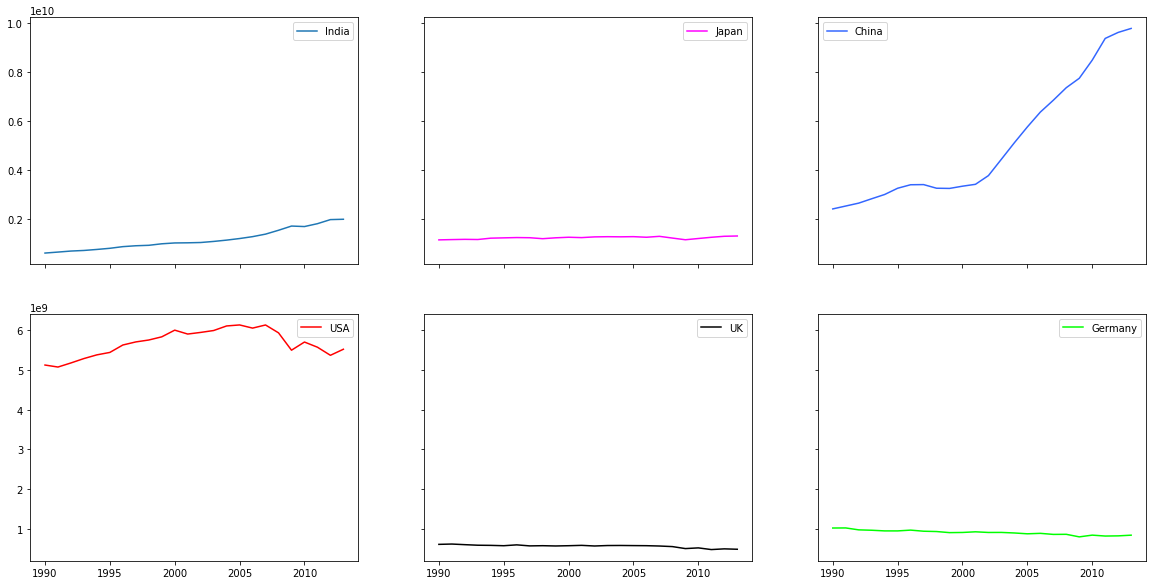

In [45]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10), sharex='col', sharey='row')

ax[0, 0].plot(dates, india_co2['Annual CO2 emissions (tonnes )'], label='India')
ax[0, 0].legend()

ax[0, 1].plot(dates, japan_co2['Annual CO2 emissions (tonnes )'], label='Japan', c='#ff00ff')
ax[0, 1].legend()

ax[0, 2].plot(dates, china_co2['Annual CO2 emissions (tonnes )'], label='China', c='#3366ff')
ax[0, 2].legend()

ax[1, 0].plot(dates, usa_co2['Annual CO2 emissions (tonnes )'], label='USA', c='red')
ax[1, 0].legend()

ax[1, 1].plot(dates, uk_co2['Annual CO2 emissions (tonnes )'], label='UK', c='black')
ax[1, 1].legend()

ax[1, 2].plot(dates, germany_co2['Annual CO2 emissions (tonnes )'], label='Germany', c='#00ff00')
ax[1, 2].legend()

In [46]:
#plotting the correlation matrix for all countries

In [47]:
india_temp_co2 = pd.concat([india,india_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['india', 'india_co2'])

In [48]:
india_temp_co2.corr()

india                     \
                                                dt AverageTemperature   
india     dt                              1.000000           0.662429   
          AverageTemperature              0.662429           1.000000   
          AverageTemperatureUncertainty   0.482627           0.445901   
india_co2 Annual CO2 emissions (tonnes )  0.966096           0.643293   

                                                                        \
                                         AverageTemperatureUncertainty   
india     dt                                                  0.482627   
          AverageTemperature                                  0.445901   
          AverageTemperatureUncertainty                       1.000000   
india_co2 Annual CO2 emissions (tonnes )                      0.518580   

                                                              india_co2  
                                         Annual CO2 emissions (tonnes )  
india     dt                                                   0.966096  
          AverageTemperature                                   0.643293  
          AverageTemperatureUncertainty                        0.518580  
india_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for India, date is slightly linear(0.66) with average temperature but highly linear(0.97) with annual co2 emissions, average temperature is slightly linear(0.64) with annual co2 emissions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2eeaf940>,
      dtype=object)

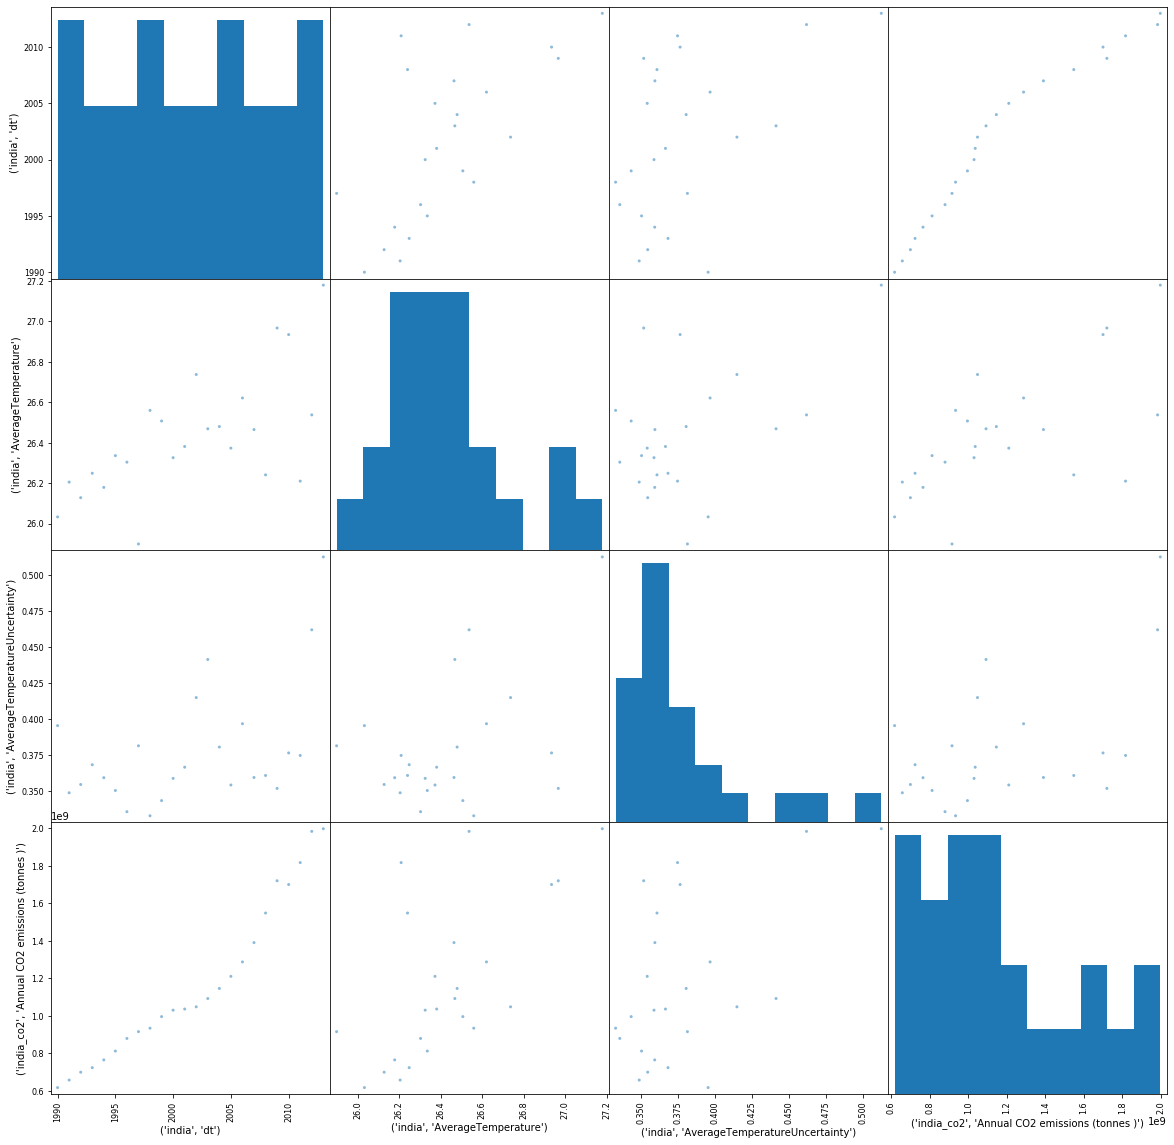

In [49]:
scatter_matrix(india_temp_co2, figsize=(20, 20))

In [50]:
japan_temp_co2 = pd.concat([japan,japan_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['japan', 'japan_co2'])

In [51]:
japan_temp_co2.corr()

japan                     \
                                                dt AverageTemperature   
japan     dt                              1.000000           0.163139   
          AverageTemperature              0.163139           1.000000   
          AverageTemperatureUncertainty   0.377753           0.183885   
japan_co2 Annual CO2 emissions (tonnes )  0.602121          -0.007864   

                                                                        \
                                         AverageTemperatureUncertainty   
japan     dt                                                  0.377753   
          AverageTemperature                                  0.183885   
          AverageTemperatureUncertainty                       1.000000   
japan_co2 Annual CO2 emissions (tonnes )                      0.307771   

                                                              japan_co2  
                                         Annual CO2 emissions (tonnes )  
japan     dt                                                   0.602121  
          AverageTemperature                                  -0.007864  
          AverageTemperatureUncertainty                        0.307771  
japan_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for Japan, date is slightly linear(0.60) with annual co2 emissions, not much correlation with average temperature, average temperature does not show a linear trend with anything.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b20fef0>,
      dtype=object)

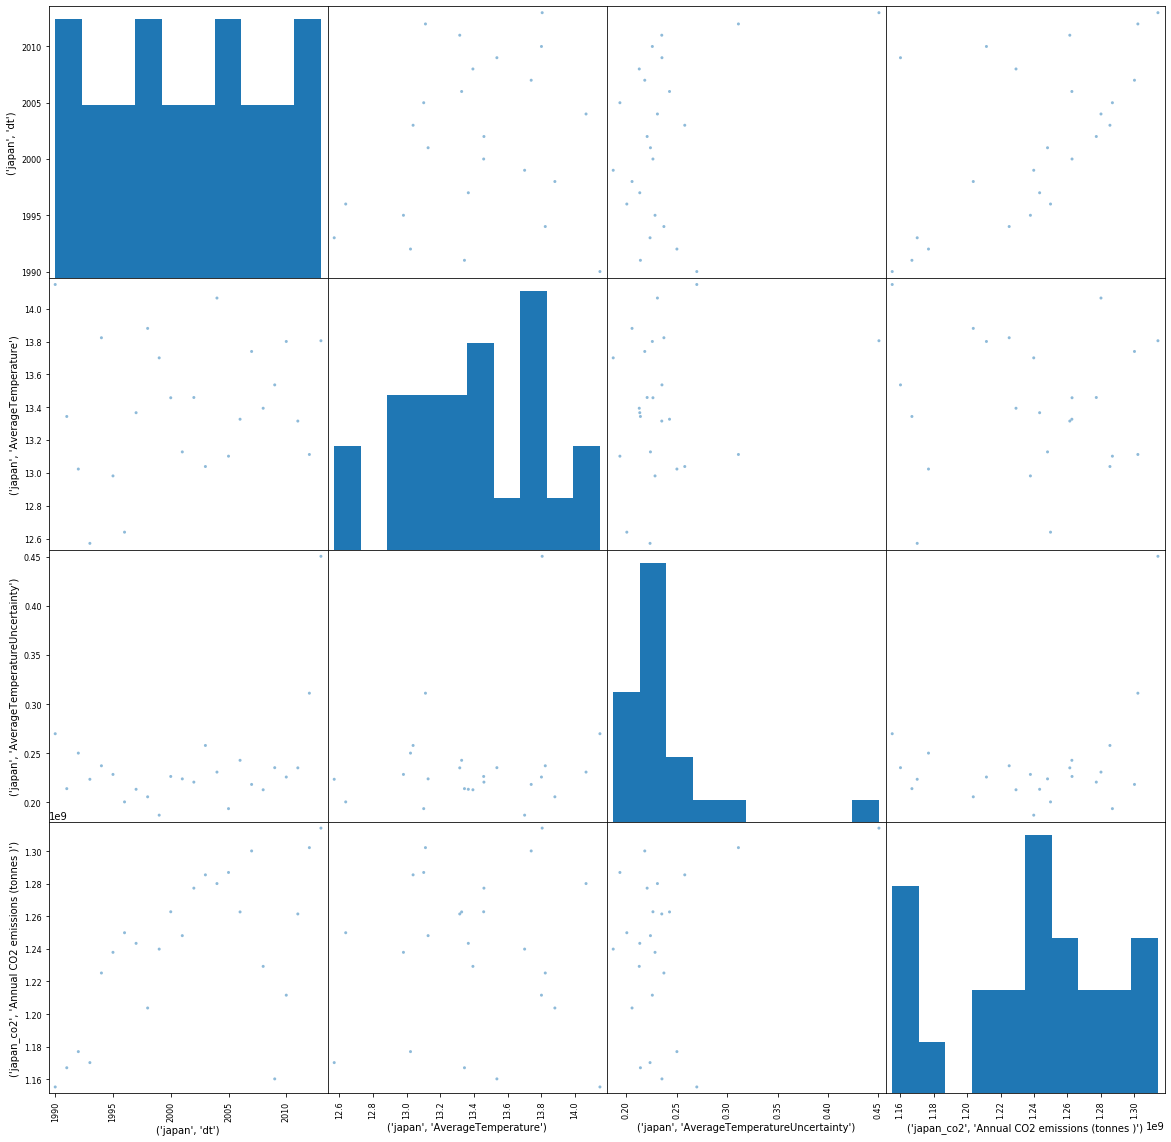

In [52]:
scatter_matrix(japan_temp_co2, figsize=(20, 20))

In [53]:
uk_temp_co2 = pd.concat([uk,uk_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['uk', 'uk_co2'])

In [54]:
uk_temp_co2.corr()

uk                     \
                                             dt AverageTemperature   
uk     dt                              1.000000           0.131128   
       AverageTemperature              0.131128           1.000000   
       AverageTemperatureUncertainty   0.284982          -0.243173   
uk_co2 Annual CO2 emissions (tonnes ) -0.845561           0.027289   

                                                                     \
                                      AverageTemperatureUncertainty   
uk     dt                                                  0.284982   
       AverageTemperature                                 -0.243173   
       AverageTemperatureUncertainty                       1.000000   
uk_co2 Annual CO2 emissions (tonnes )                     -0.442839   

                                                              uk_co2  
                                      Annual CO2 emissions (tonnes )  
uk     dt                                                  -0.845561  
       AverageTemperature                                   0.027289  
       AverageTemperatureUncertainty                       -0.442839  
uk_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for UK, date is negatively and linearly correlated with annual co2 emissions(-0.84), not much with average temperature, average temperature doesn't show a good trend with anything.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29210630>,
      dtype=object)

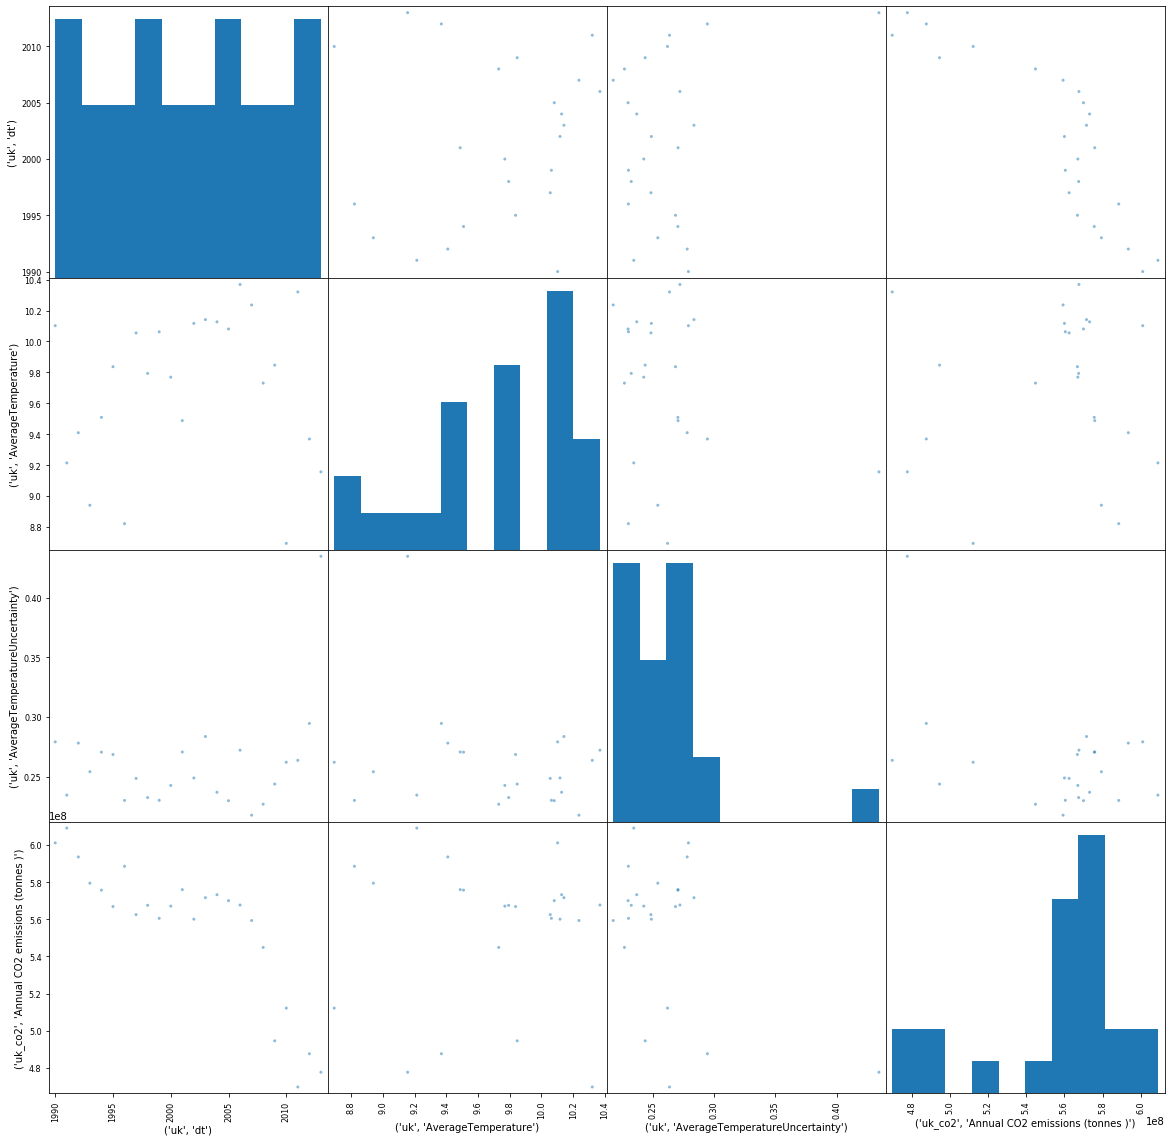

In [55]:
scatter_matrix(uk_temp_co2, figsize=(20, 20))

In [56]:
usa_temp_co2 = pd.concat([usa,usa_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['usa', 'usa_co2'])

In [57]:
usa_temp_co2.corr()

usa                     \
                                              dt AverageTemperature   
usa     dt                              1.000000           0.537105   
        AverageTemperature              0.537105           1.000000   
        AverageTemperatureUncertainty   0.498608           0.689160   
usa_co2 Annual CO2 emissions (tonnes )  0.469275           0.109526   

                                                                      \
                                       AverageTemperatureUncertainty   
usa     dt                                                  0.498608   
        AverageTemperature                                  0.689160   
        AverageTemperatureUncertainty                       1.000000   
usa_co2 Annual CO2 emissions (tonnes )                     -0.143728   

                                                              usa_co2  
                                       Annual CO2 emissions (tonnes )  
usa     dt                                                   0.469275  
        AverageTemperature                                   0.109526  
        AverageTemperatureUncertainty                       -0.143728  
usa_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for USA, there is no much linear relationship for average temperature and co2 emissions with date, and average temperatue does not show any trend with respect to annual co2 emissions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a252c0780>,
      dtype=object)

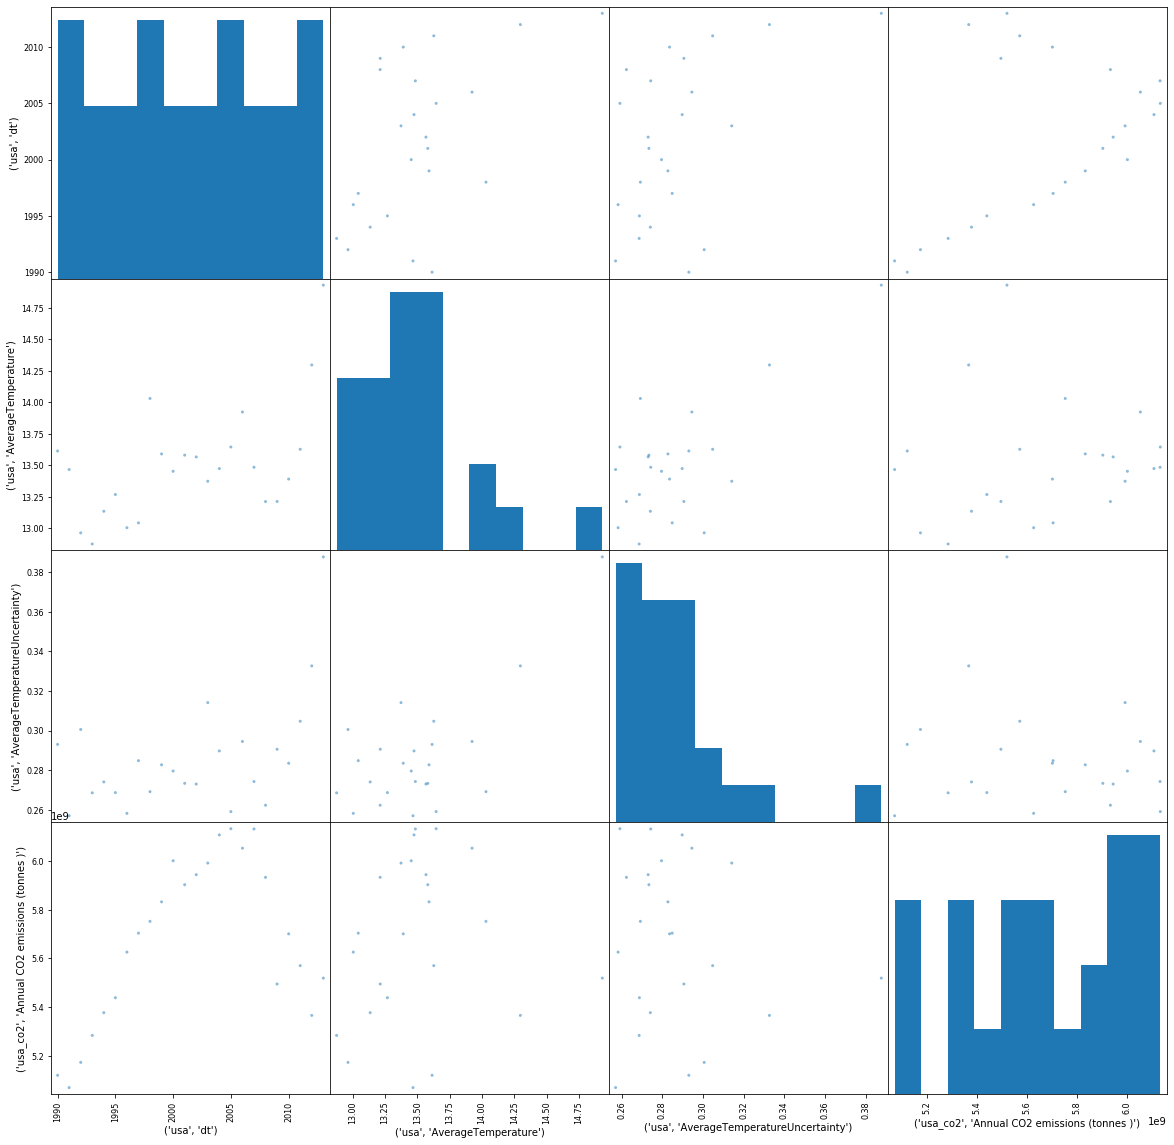

In [58]:
scatter_matrix(usa_temp_co2, figsize=(20, 20))

In [59]:
china_temp_co2 = pd.concat([china,china_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['china', 'china_co2'])

In [60]:
china_temp_co2.corr()

china                     \
                                                dt AverageTemperature   
china     dt                              1.000000           0.296880   
          AverageTemperature              0.296880           1.000000   
          AverageTemperatureUncertainty   0.519485           0.339821   
china_co2 Annual CO2 emissions (tonnes )  0.940295           0.222458   

                                                                        \
                                         AverageTemperatureUncertainty   
china     dt                                                  0.519485   
          AverageTemperature                                  0.339821   
          AverageTemperatureUncertainty                       1.000000   
china_co2 Annual CO2 emissions (tonnes )                      0.623769   

                                                              china_co2  
                                         Annual CO2 emissions (tonnes )  
china     dt                                                   0.940295  
          AverageTemperature                                   0.222458  
          AverageTemperatureUncertainty                        0.623769  
china_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for China, date is highly linear(0.94) with annual co2 emissions, very similar to India, not much trend with average temperature, average temperature and annual co2 emissions are also not showing a linear trend.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1de11390>,
      dtype=object)

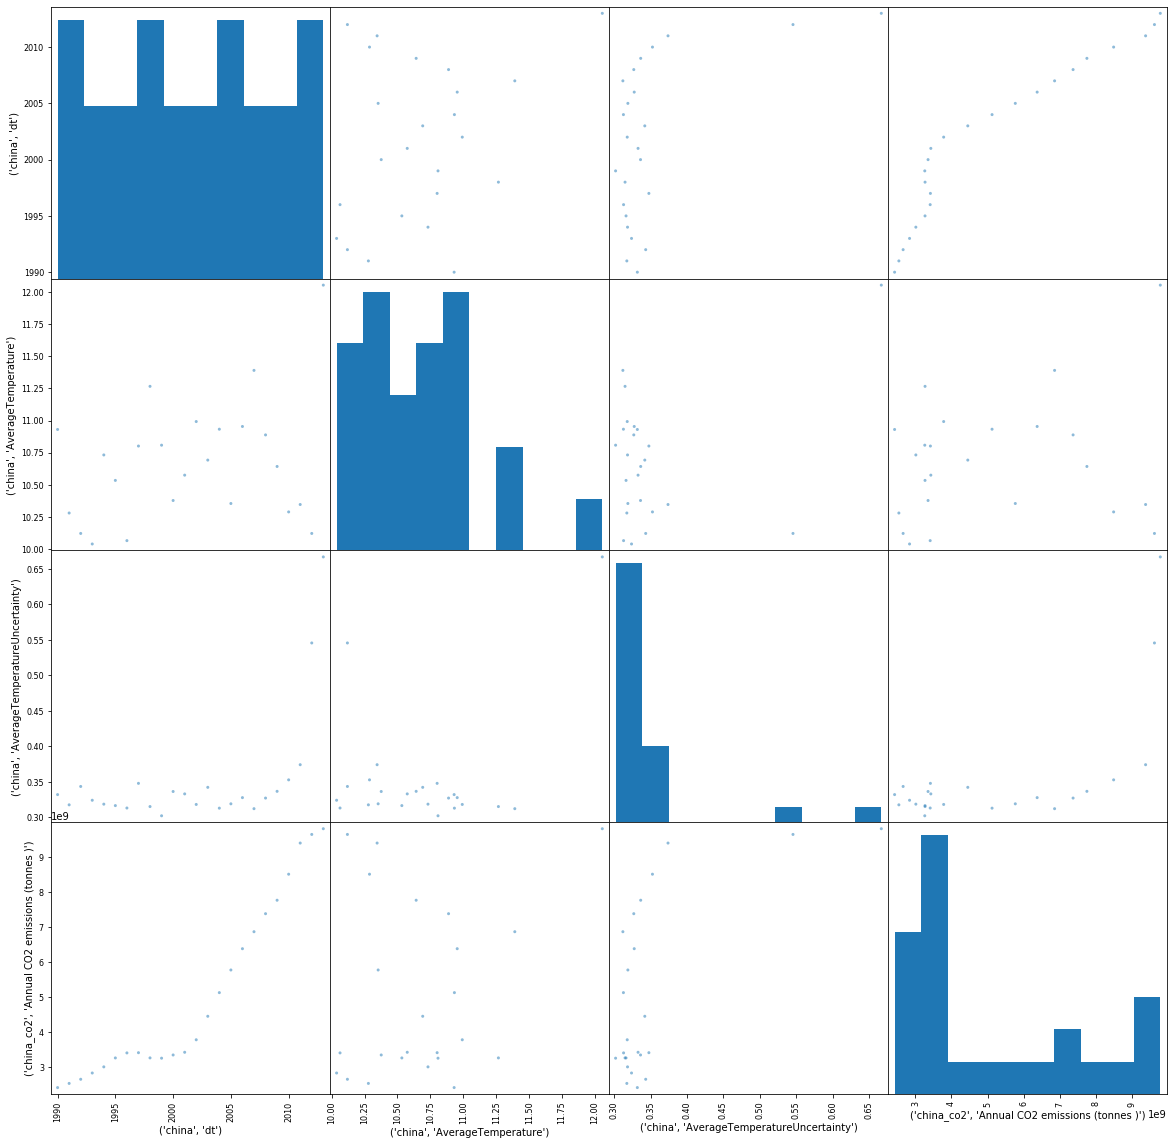

In [61]:
scatter_matrix(china_temp_co2, figsize=(20, 20))

In [62]:
germany_temp_co2 = pd.concat([germany, germany_co2['Annual CO2 emissions (tonnes )']], axis=1, keys=['germany', 'germany_co2'])

In [63]:
germany_temp_co2.corr()

germany                     \
                                                  dt AverageTemperature   
germany     dt                              1.000000           0.137862   
            AverageTemperature              0.137862           1.000000   
            AverageTemperatureUncertainty  -0.044270           0.116005   
germany_co2 Annual CO2 emissions (tonnes ) -0.957389          -0.217959   

                                                                          \
                                           AverageTemperatureUncertainty   
germany     dt                                                 -0.044270   
            AverageTemperature                                  0.116005   
            AverageTemperatureUncertainty                       1.000000   
germany_co2 Annual CO2 emissions (tonnes )                      0.086034   

                                                              germany_co2  
                                           Annual CO2 emissions (tonnes )  
germany     dt                                                  -0.957389  
            AverageTemperature                                  -0.217959  
            AverageTemperatureUncertainty                        0.086034  
germany_co2 Annual CO2 emissions (tonnes )                       1.000000

We see that for Germany, date is negatively and linearly correlated with annual co2 emissions(-0.957), not much with average temperature, average temperature doesn't show a good trend with anything, it shows a slighly negative correlation with annual co2 emissions, but not linear.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33ecf1d0>,
      dtype=object)

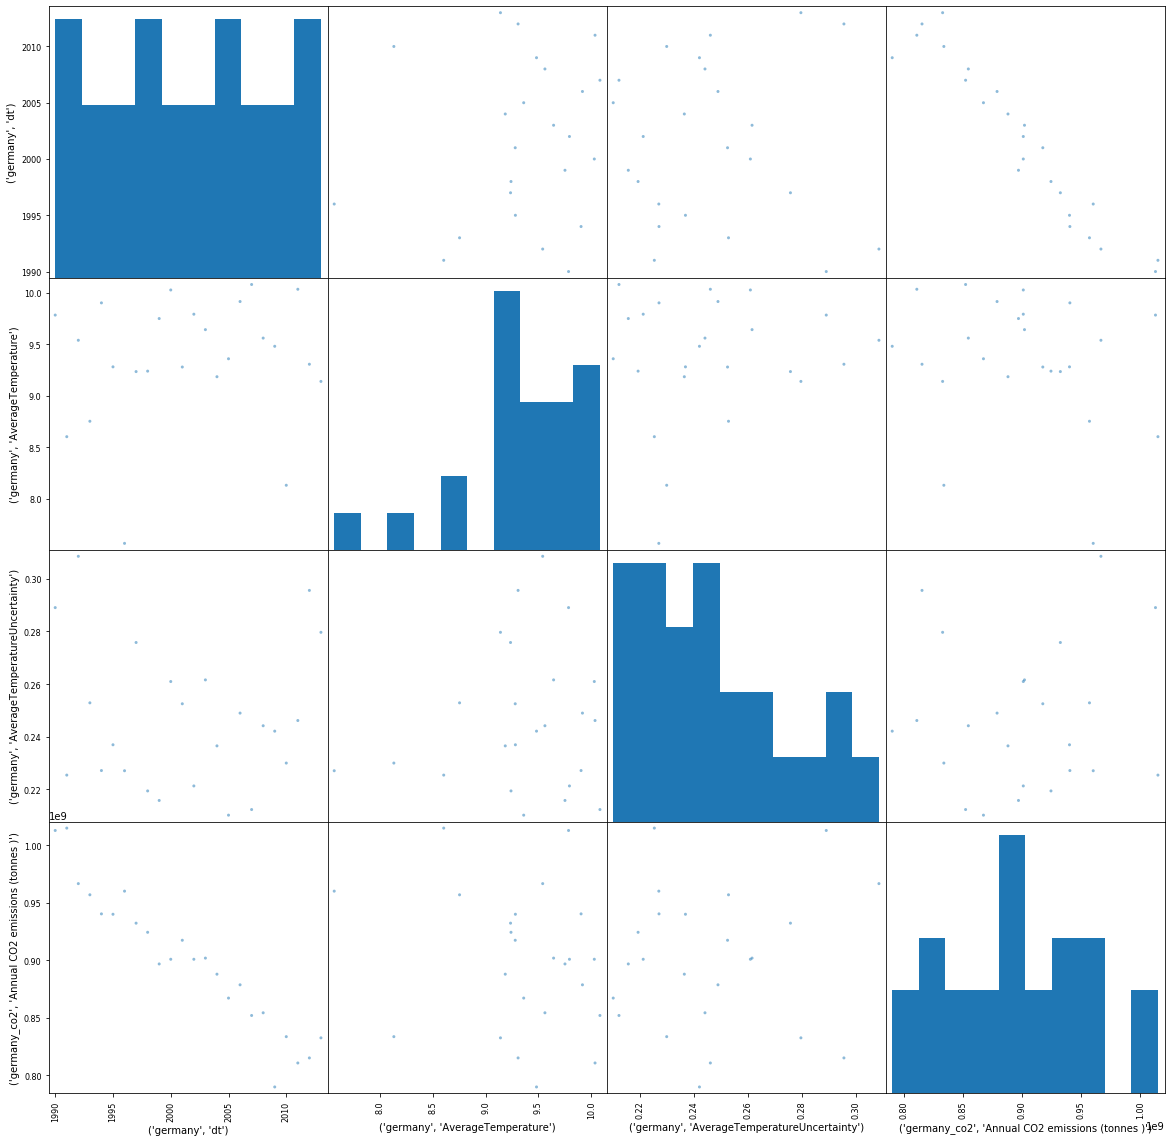

In [64]:
scatter_matrix(germany_temp_co2, figsize=(20, 20))

In [65]:
ind_g

1990  \
Country Name   Indicator                                          Subindicator Type                
China          Competitive Industrial Performance Quintile        Value                 0.700000   
               Competitive Industrial Performance Rank            Rank                 32.000000   
               Competitive Industrial Performance Score           Value                 0.088960   
               Impact of a country on World Manufactures Trade    Value                 0.025118   
               Impact of a country on World Manufacturing Valu... Value                 0.033536   
               Industrial export quality index                    Value                 0.595937   
               Industrialization intensity index                  Value                 0.563626   
               MVA per capita index                               Value                 0.013570   
               Manufactured Exports per capita                    Value                59.520071   
               Manufactured Exports per capita index              Value                 0.003678   
               Manufactured Exports share in total exports        Value                 0.840088   
               Manufacturing Value Added per capita               Value               161.206594   
               Medium- and High-Tech Manufacturing Value Added... Value                 0.378387   
               Medium- and High-Tech manufactured Exports shar... Value                 0.284444   
               Share in world manufacturing exports index         Value                 0.170583   
               Share of MVA in GDP index                          Value                 0.550047   
               Share of Medium and High-Tech Activities in Man... Value                 0.342066   
               Share of Medium and High-Tech Activities in Tot... Value                 0.577205   
               Share of manufactured exports in total exports ... Value                 0.849808   
               Share of world MVA index                           Value                 0.173312   
Germany        Competitive Industrial Performance Quintile        Value                 0.900000   
               Competitive Industrial Performance Rank            Rank                  1.000000   
               Competitive Industrial Performance Score           Value                 0.616037   
               Impact of a country on World Manufactures Trade    Value                 0.147250   
               Impact of a country on World Manufacturing Valu... Value                 0.101940   
               Industrial export quality index                    Value                 0.875081   
               Industrialization intensity index                  Value                 0.661786   
               MVA per capita index                               Value                 0.636065   
               Manufactured Exports per capita                    Value              4524.199228   
               Manufactured Exports per capita index              Value                 0.281620   
...                                                                                          ...   
United Kingdom Manufactured Exports share in total exports        Value                 0.840724   
               Manufacturing Value Added per capita               Value              3864.383217   
               Medium- and High-Tech Manufacturing Value Added... Value                 0.447573   
               Medium- and High-Tech manufactured Exports shar... Value                 0.658528   
               Share in world manufacturing exports index         Value                 0.440725   
               Share of MVA in GDP index                          Value                 0.309191   
               Share of Medium and High-Tech Activities in Man... Value                 0.791930   
               Share of Medium and High-Tech Activities in Tot... Value                 0.68

In [66]:
ind

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,China,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,0.133536,0.136619,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,China,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,27.000000,25.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,China,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,0.900000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,China,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,0.034336,0.033401,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,China,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,0.288280,0.276394,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,China,Impact of a country on World Manufacturing Val...,Value,0.033536,0.037863,0.045071,0.053268,0.059694,0.063942,0.069088,...,0.117472,0.126562,0.138968,0.153513,0.181587,0.186882,0.197423,0.210459,0.219102,0.229128
6,China,Share of world MVA index,Value,0.173312,0.201894,0.236516,0.270443,0.295573,0.311842,0.339095,...,0.575024,0.628600,0.709239,0.815550,0.977669,1.000000,1.000000,1.000000,1.000000,1.000000
7,China,Industrialization intensity index,Value,0.563626,0.561078,0.578220,0.566404,0.571156,0.588257,0.591811,...,0.643858,0.652823,0.657836,0.661328,0.694810,0.731502,0.738504,0.740375,0.740964,0.755593
8,China,Medium- and High-Tech Manufacturing Value Adde...,Value,0.378387,0.383534,0.395509,0.352256,0.355199,0.379784,0.372625,...,0.424449,0.423290,0.420701,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831,0.413831
9,China,Share of Medium and High-Tech Activities in To...,Value,0.577205,0.550754,0.560132,0.491528,0.487470,0.506755,0.497307,...,0.511364,0.498923,0.484481,0.468498,0.481051,0.479670,0.477007,0.480751,0.481928,0.511185


In [67]:
china_ind = ind.iloc[0:20,:]
ger_ind = ind.iloc[20:40,:]
UK_ind = ind.iloc[40:60,:]
india_ind = ind.iloc[60:80,:]
japan_ind = ind.iloc[80:100,:]
usa_ind = ind.iloc[100:120,:]


In [68]:
list(ind['Country Name'])

['China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',


In [69]:
ChinaMedHighTech = china_ind.loc[china_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
ChinaMvaPCIndex = china_ind.loc[china_ind['Indicator'] == 'MVA per capita index']
ChinaMvaGDPIndex = china_ind.loc[china_ind['Indicator'] == 'Share of MVA in GDP index']

GerMedHighTech = ger_ind.loc[ger_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
GerMvaPCIndex = ger_ind.loc[ger_ind['Indicator'] == 'MVA per capita index']
GerMvaGDPIndex = ger_ind.loc[ger_ind['Indicator'] == 'Share of MVA in GDP index']

UKMedHighTech = UK_ind.loc[UK_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
UKMvaPCIndex = UK_ind.loc[UK_ind['Indicator'] == 'MVA per capita index']
UKMvaGDPIndex = UK_ind.loc[UK_ind['Indicator'] == 'Share of MVA in GDP index']


indiaMedHighTech = india_ind.loc[india_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
indiaMvaPCIndex = india_ind.loc[india_ind['Indicator'] == 'MVA per capita index']
indiaMvaGDPIndex = india_ind.loc[india_ind['Indicator'] == 'Share of MVA in GDP index']

JapanMedHighTech = japan_ind.loc[japan_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
JapanMvaPCIndex = japan_ind.loc[japan_ind['Indicator'] == 'MVA per capita index']
JapanMvaGDPIndex = japan_ind.loc[japan_ind['Indicator'] == 'Share of MVA in GDP index']

USAMedHighTech = usa_ind.loc[usa_ind['Indicator'] == 'Medium- and High-Tech Manufacturing Value Added share in total manufacturing value added']
USAMvaPCIndex = usa_ind.loc[usa_ind['Indicator'] == 'MVA per capita index']
USAMvaGDPIndex = usa_ind.loc[usa_ind['Indicator'] == 'Share of MVA in GDP index']


In [70]:
(USAMvaGDPIndex.iloc[:,3:-1])

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
114,0.261164,0.251449,0.24593,0.25645,0.262437,0.275881,0.270509,0.266787,0.267197,0.282062,...,0.300865,0.302844,0.318679,0.327597,0.321915,0.324701,0.361265,0.362716,0.352499,0.351447


In [71]:
dates = (india['dt'].to_list())+[2014]
print(dates)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [72]:
USco2Data = pd.DataFrame(usa_co2['Annual CO2 emissions (tonnes )'])
USco2Data = USco2Data.T
USco2Data.columns = dates[:-1]

In [73]:

finCorr = pd.DataFrame([USco2Data.values.tolist()[0], USAMvaGDPIndex.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MVA data']
finCorr.corr()

,Co2 data,MVA data
Co2 data,1.000000,0.309508
MVA data,0.309508,1.000000


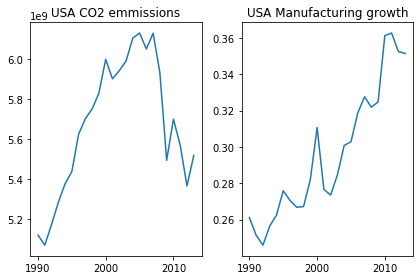

In [74]:

plt.subplot(1,2,1)
plt.plot(dates[:-1], USco2Data.values.tolist()[0])
plt.title("USA CO2 emmissions")

plt.subplot(1,2,2)
plt.plot(dates[:-1], (USAMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("USA Manufacturing growth")



plt.tight_layout()

Text(0.5, 1.0, 'Medium and high tech manufacturing growth in USA')

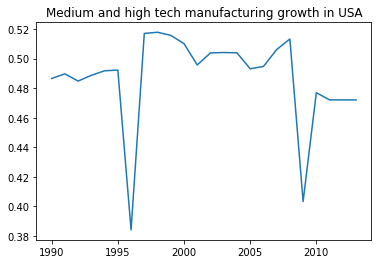

In [75]:

plt.plot(dates[:-1], (USAMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in USA")


In [76]:
CHIco2Data = pd.DataFrame(china_co2['Annual CO2 emissions (tonnes )'])
CHIco2Data = CHIco2Data.T
CHIco2Data.columns = dates[:-1]

In [77]:

finCorr = pd.DataFrame([CHIco2Data.values.tolist()[0], ChinaMvaGDPIndex.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MVA data']
finCorr.corr()

,Co2 data,MVA data
Co2 data,1.000000,0.969877
MVA data,0.969877,1.000000


In [78]:
finCorr = pd.DataFrame([CHIco2Data.values.tolist()[0], ChinaMedHighTech.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MedHigh tech data']
finCorr.corr()

,Co2 data,MedHigh tech data
Co2 data,1.000000,0.418051
MedHigh tech data,0.418051,1.000000


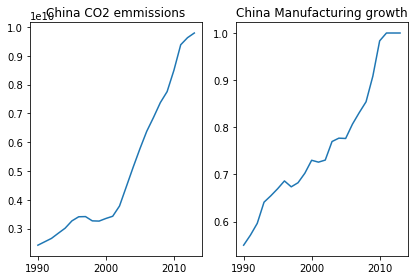

In [79]:
plt.subplot(1,2,1)
plt.plot(dates[:-1], CHIco2Data.values.tolist()[0])
plt.title("China CO2 emmissions")

plt.subplot(1,2,2)
plt.plot(dates[:-1], (ChinaMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("China Manufacturing growth")
plt.tight_layout()


Text(0.5, 1.0, 'Medium and high tech manufacturing growth in China')

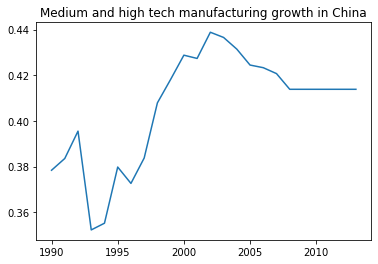

In [80]:
plt.plot(dates[:-1], (ChinaMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in China")

In [81]:
GERco2Data = pd.DataFrame(germany_co2['Annual CO2 emissions (tonnes )'])
GERco2Data = GERco2Data.T
GERco2Data.columns = dates[:-1]

In [82]:

finCorr = pd.DataFrame([GERco2Data.values.tolist()[0], GerMvaGDPIndex.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MVA data']
finCorr.corr()

,Co2 data,MVA data
Co2 data,1.000000,-0.568261
MVA data,-0.568261,1.000000


In [96]:

finCorr = pd.DataFrame([GERco2Data.values.tolist()[0], GerMedHighTech.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MedHigh tech data']
finCorr.corr()

,Co2 data,MedHigh tech data
Co2 data,1.000000,-0.867122
MedHigh tech data,-0.867122,1.000000


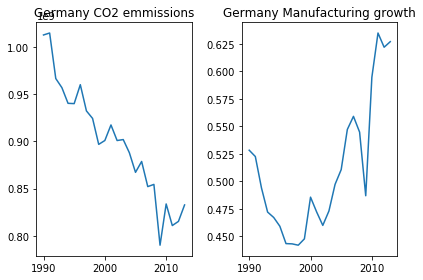

In [83]:
plt.subplot(1,2,1)
plt.plot(dates[:-1], GERco2Data.values.tolist()[0])
plt.title("Germany CO2 emmissions")

plt.subplot(1,2,2)
plt.plot(dates[:-1], (GerMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("Germany Manufacturing growth")
plt.tight_layout()


Text(0.5, 1.0, 'Medium and high tech manufacturing growth in Germany')

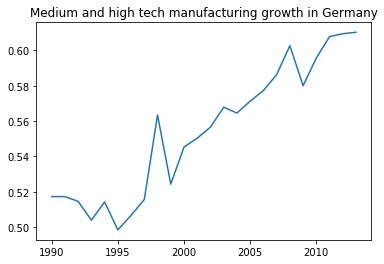

In [84]:
plt.plot(dates[:-1], (GerMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in Germany")

In [85]:
JAPco2Data = pd.DataFrame(japan_co2['Annual CO2 emissions (tonnes )'])
JAPco2Data = JAPco2Data.T
JAPco2Data.columns = dates[:-1]

In [86]:

finCorr = pd.DataFrame([JAPco2Data.values.tolist()[0], JapanMvaGDPIndex.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MVA data']
finCorr.corr()

,Co2 data,MVA data
Co2 data,1.000000,0.347196
MVA data,0.347196,1.000000


In [97]:

finCorr = pd.DataFrame([JAPco2Data.values.tolist()[0], JapanMedHighTech.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MedHigh tech data']
finCorr.corr()

,Co2 data,MedHigh tech data
Co2 data,1.000000,0.599776
MedHigh tech data,0.599776,1.000000


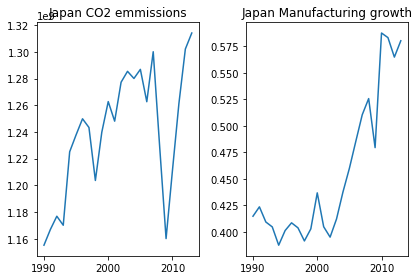

In [87]:
plt.subplot(1,2,1)


plt.plot(dates[:-1], JAPco2Data.values.tolist()[0])
plt.title("Japan CO2 emmissions")

plt.subplot(1,2,2)

plt.plot(dates[:-1], (JapanMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("Japan Manufacturing growth")
plt.tight_layout()


Text(0.5, 1.0, 'Medium and high tech manufacturing growth in Japan')

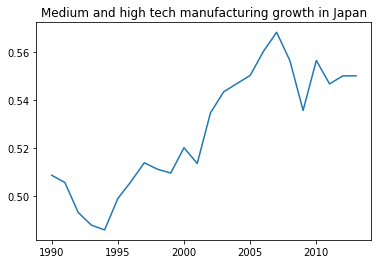

In [88]:
plt.plot(dates[:-1], (JapanMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in Japan")

In [89]:
INDco2Data = pd.DataFrame(india_co2['Annual CO2 emissions (tonnes )'])
INDco2Data = INDco2Data.T
INDco2Data.columns = dates[:-1]

In [90]:

finCorr = pd.DataFrame([INDco2Data.values.tolist()[0], indiaMvaGDPIndex.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MVA data']
finCorr.corr()

,Co2 data,MVA data
Co2 data,1.000000,0.928784
MVA data,0.928784,1.000000


In [98]:

finCorr = pd.DataFrame([INDco2Data.values.tolist()[0], indiaMedHighTech.iloc[:,3:-1].values.tolist()[0]],columns=dates[:-1])
finCorr = finCorr.T
finCorr.columns = ['Co2 data', 'MedHigh tech data']
finCorr.corr()

,Co2 data,MedHigh tech data
Co2 data,1.000000,-0.456351
MedHigh tech data,-0.456351,1.000000


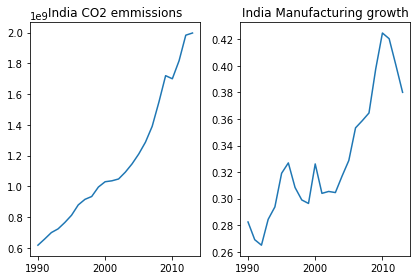

In [91]:
plt.subplot(1,2,1)


plt.plot(dates[:-1], INDco2Data.values.tolist()[0])
plt.title("India CO2 emmissions")

plt.subplot(1,2,2)

plt.plot(dates[:-1], (indiaMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("India Manufacturing growth")
plt.tight_layout()


Text(0.5, 1.0, 'Medium and high tech manufacturing growth in India')

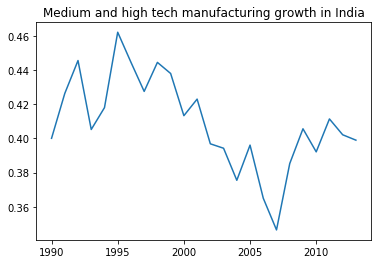

In [92]:
plt.plot(dates[:-1], (indiaMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in India")

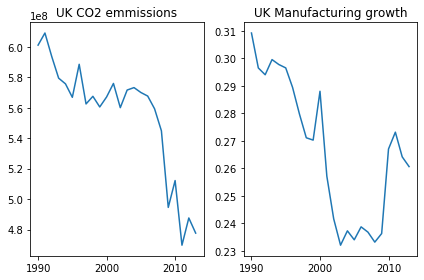

In [93]:
UKco2Data = pd.DataFrame(uk_co2['Annual CO2 emissions (tonnes )'])
UKco2Data = UKco2Data.T
UKco2Data.columns = dates[:-1]

plt.subplot(1,2,1)


plt.plot(dates[:-1], UKco2Data.values.tolist()[0])
plt.title("UK CO2 emmissions")

plt.subplot(1,2,2)

plt.plot(dates[:-1], (UKMvaGDPIndex.iloc[:,3:-1]).values.tolist()[0])
plt.title("UK Manufacturing growth")
plt.tight_layout()


Text(0.5, 1.0, 'Medium and high tech manufacturing growth in UK')

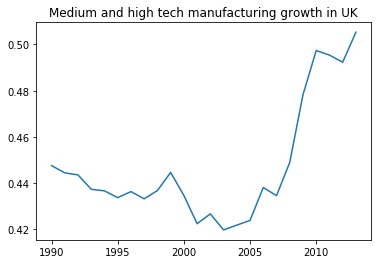

In [94]:
plt.plot(dates[:-1], (UKMedHighTech.iloc[:,3:-1]).values.tolist()[0])
plt.title("Medium and high tech manufacturing growth in UK")

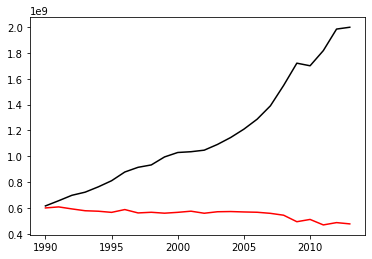

In [95]:
plt.plot(dates[:-1], INDco2Data.values.tolist()[0], c="black")
plt.plot(dates[:-1], UKco2Data.values.tolist()[0], c="red")

#There seems to be a correlation between medium and high tech manufacturing value share as well in developed countries. In developing and bigger countries, there is an almost certain correlation between increasing industrialisation and growing emissions. 